In [0]:
#Este programa detecta el cancer de pecho basado en datos

In [0]:
# Importamos las bibbliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos los datos
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('wisc_bc_data.csv')
df.head(7)

Saving wisc_bc_data.csv to wisc_bc_data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,0.2864,1.4400,2.206,20.30,0.007278,0.020470,0.04447,0.008799,0.01868,0.003339,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.97,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732


In [3]:
# Presenta el numero de filas y columnas del dataset
df.shape

(569, 32)

In [4]:
# Presenta el numero de valores vacíos en los datos por columna
df.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [5]:
# Obtenemos el número de células de diagnóstico Maligno (M) o Benigno (B)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

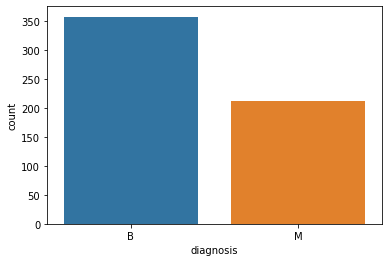

In [6]:
# Graficamos estos números
sns.countplot(df['diagnosis'], label='cantidad')


In [7]:
# Chequeamos el tipo de datos en las columnas
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [0]:
# Codificamos los valores categoriales (transformar la categoría de diagnóstico a número, ya que está como M o B) en la data
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values) #Los dos puntos indican 'todas las filas. El 1 indica: la columna uno(diagnosis)

# BENIGNO PASA A ESTAR REPRESENTADO POR EL CERO '0'
# MALIGNO POR EL UNO '1'



/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


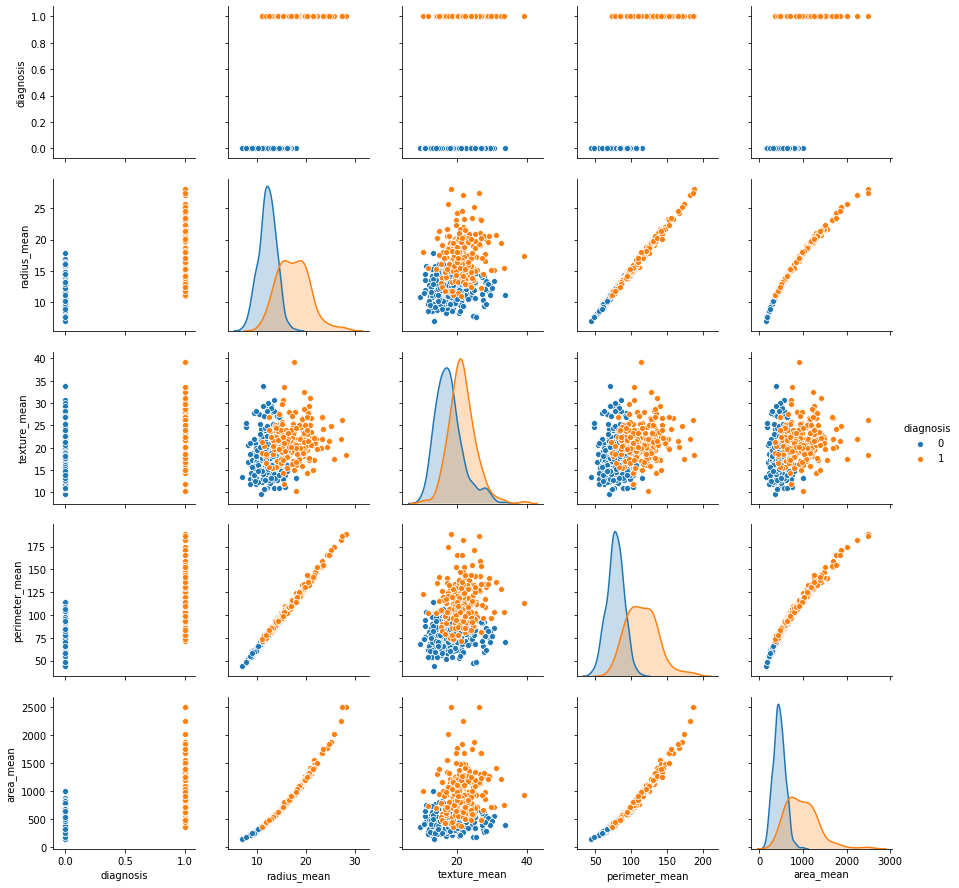

In [9]:
# Creamos un grafico tomando los valores de las primeras 5 columnas
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')

In [10]:
# Imprime las primeras filas de la data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [11]:
# Obtiene la correlación de las columnas
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


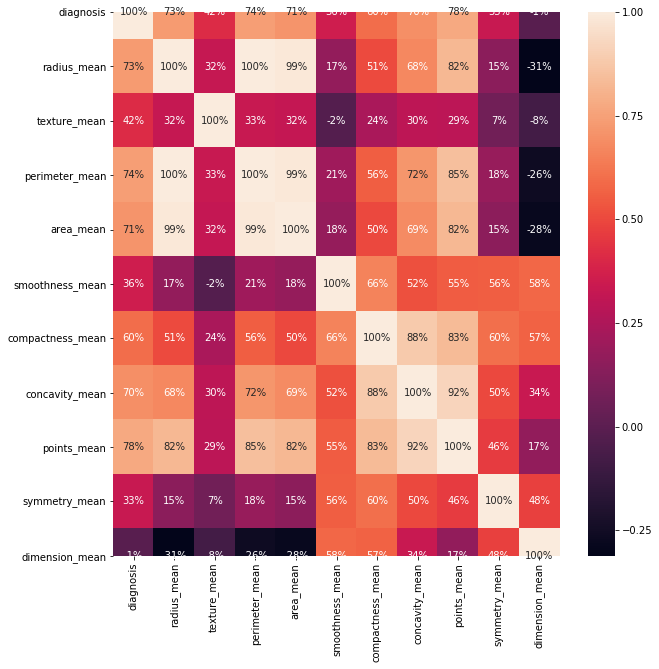

In [12]:
# Visualizamos la correlación
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt= '.0%')

In [0]:
# Dividimos los datos en valores independiente(X) y dependientes(Y)
X = df.iloc[:,2:31].values #Toma los valores de todas las filas pero desde la tercera columna (2) hasta la última (32)
Y = df.iloc[:,1].values # Toma los valores de todas las filas pero solo de la primera columna, pues este es el valor que hay que determinar (B o M / 0 o 1)


In [0]:
# Dividimos el dataset en 75% de datos para el entrenamiento y 25% para la prueba
from  sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

In [0]:
# Escala los datos (características escalar)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [0]:
# Creamos una función para los modelos
def models(X_train, Y_train):
  #Regresión
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Arbol de decisiones
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Clasificador Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train, Y_train)

  # Se imprime la certeza de los datos de entrenamiento
  print('[0] Grado de certeza en la Regresion logística con datos de entrenamiento: ', log.score(X_train, Y_train))
  print('[1] Grado de certeza en el árbol de decisiones con datos de entrenamiento: ', tree.score(X_train, Y_train))
  print('[2] Grado de certeza en el clasificador Random Forest con datos de entrenamiento: ', forest.score(X_train, Y_train))

  return log, tree, forest


In [19]:
model = models(X_train, Y_train)

[0] Grado de certeza en la Regresion logística con datos de entrenamiento:  0.9882629107981221
[1] Grado de certeza en el árbol de decisiones con datos de entrenamiento:  1.0
[2] Grado de certeza en el clasificador Random Forest con datos de entrenamiento:  0.9976525821596244


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
# Certeza en el modelo de prueba con matrix de confusion
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0] # True-Positive (Cierto-Positivo)
  TN = cm[1][1] # True-Negative (Cierto-Negativo)
  FN = cm[1][0] # False-Negative (Falso-Negativo)
  FP = cm[0][1] # False-Positive (Falso-Positivo)

  print(cm)
  print('Prueba de certeza = ', (TP+TN)/(TP+TN+FN+FP))
  print()

Model  0
[[91  2]
 [ 1 49]]
Prueba de certeza =  0.9790209790209791

Model  1
[[80 13]
 [ 3 47]]
Prueba de certeza =  0.8881118881118881

Model  2
[[86  7]
 [ 2 48]]
Prueba de certeza =  0.9370629370629371



In [25]:
# Muestra otra manera para obtener las métricas de los modelos
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model)):
  print('Model ',i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.96      0.98      0.97        50

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791

Model  1
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        93
           1       0.78      0.94      0.85        50

    accuracy                           0.89       143
   macro avg       0.87      0.90      0.88       143
weighted avg       0.90      0.89      0.89       143

0.8881118881118881

Model  2
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        93
           1       0.87      0.96      0.91        50

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighte

In [26]:
# Imprime la prediccion del modelo Random Forest Classifier
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0]

[1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0]
